In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv', header =0)
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [5]:
data['Sleep Disorder'] = data['Sleep Disorder'].map({'Sleep Apnea': 2, 'Insomnia': 3}).fillna(1)
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,1.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,1.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,1.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,2.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,2.0


In [6]:
data.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [7]:
features = data[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate']]
target = data['Sleep Disorder']
feature_train, feature_test, target_train, target_test = train_test_split(features, target, test_size=0.2, shuffle=False)

In [8]:
ss=StandardScaler()
feature_train = ss.fit_transform(feature_train)
feature_test = ss.transform(feature_test)

In [9]:
clf = LogisticRegression()
clf.fit(feature_train, target_train)
print(clf.score(feature_train, target_train))
print(clf.score(feature_test, target_test))

0.8762541806020067
0.5066666666666667


In [10]:
Alice = np.array([7.5, 8, 50, 4, 68])  # 예: Alice는 충분한 수면과 활동 수준
Bob = np.array([5.2, 5, 25, 7, 82])  # 예: Bob은 낮은 수면과 높은 스트레스
Charlie = np.array([6.0, 6, 40, 5, 75])  # 예: Charlie는 평균적인 조건
Diana = np.array([4.5, 4, 18, 9, 88])  # 예: Diana는 낮은 수면과 스트레스 문제
Eve = np.array([8.0, 9, 60, 3, 62])  # 예: Eve는 이상적인 생활 습관
sample = np.array([Alice, Bob, Charlie, Diana, Eve])
sample = ss.transform(sample)
pred = clf.predict(sample)
print(pred)
print(clf.predict_proba(sample))

[1. 3. 3. 2. 1.]
[[9.09630220e-01 2.92008208e-03 8.74496978e-02]
 [1.03187458e-02 3.63952959e-01 6.25728295e-01]
 [2.84373256e-02 7.22746177e-02 8.99288057e-01]
 [1.41936737e-03 8.31967043e-01 1.66613589e-01]
 [9.84685666e-01 1.38331072e-04 1.51760034e-02]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [11]:
###결정트리

In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
import graphviz
data = pd.read_csv('/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv', header =0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [13]:
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [14]:
data['Sleep Disorder'] = data['Sleep Disorder'].map({'Sleep Apnea': 2, 'Insomnia': 3}).fillna(1)
data.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,1.0
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,1.0
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,1.0
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,2.0
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,2.0


In [15]:
data.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [16]:
feature = data[['Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'Heart Rate']]
target = data['Sleep Disorder']

In [17]:
# feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.2, random_state=42)
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.2, shuffle=False)
print(feature_train.shape, feature_test.shape)

(299, 5) (75, 5)


In [18]:
ss = StandardScaler()
feature_train = ss.fit_transform(feature_train)
feature_test = ss.transform(feature_test)

In [19]:
dt = DecisionTreeClassifier(max_depth=3, random_state=1)
dt.fit(feature_train, target_train)
print(dt.score(feature_train, target_train))
print(dt.score(feature_test, target_test))

0.8963210702341137
0.5866666666666667


In [20]:
print(dt.classes_)
print(dt.feature_importances_)

[1. 2. 3.]
[0.6882512  0.         0.18811325 0.         0.12363555]


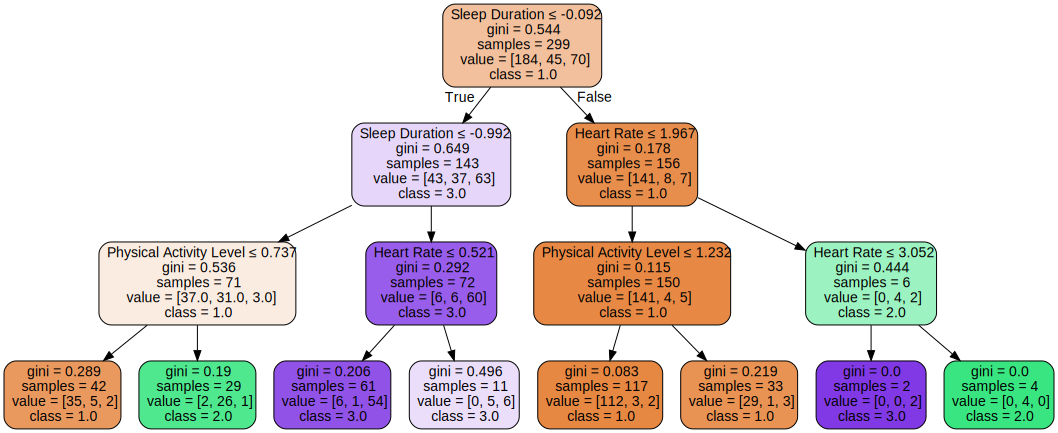

In [21]:
class_names = [str(c) for c in dt.classes_]

# 이제 업데이트된 class_names를 export_graphviz에서 사용합니다.
dot_data = tree.export_graphviz(dt, out_file=None,
                                feature_names=feature.columns,
                                class_names=class_names,  # 문자열 목록 전달
                                filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph

In [22]:
Jin = [7.5, 8, 50, 4, 68]
Bob = [5.2, 5, 25, 7, 82]  # 예: Bob은 낮은 수면과 높은 스트레스
Charlie = [6.0, 6, 40, 5, 75]  # 예: Charlie는 평균적인 조건
Diana = [4.5, 4, 18, 9, 88]  # 예: Diana는 낮은 수면과 스트레스 문제
Eve = [8.0, 9, 60, 3, 62]  # 예: Eve는 이상적인 생활 습관
pred = dt.predict([Jin, Bob, Charlie, Diana, Eve])
print(pred)

[2. 2. 2. 2. 2.]


In [23]:
###SVM

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [25]:
sleep = pd.read_csv('/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv')
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [26]:
sleep.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [27]:
sleep['Sleep Disorder']=sleep['Sleep Disorder'].map({'Sleep Apnea':2, 'Insomia':3}).fillna(1)
sleep.isnull().sum()

,0
Person ID,0
Gender,0
Age,0
Occupation,0
Sleep Duration,0
Quality of Sleep,0
Physical Activity Level,0
Stress Level,0
BMI Category,0
Blood Pressure,0


In [28]:
feature = sleep[['Age', 'Sleep Duration', 'Quality of Sleep', 'Stress Level']]
target = sleep['Sleep Disorder']
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.2, random_state=42)

In [29]:
from sklearn import svm
clf_kl = svm.SVC(kernel='linear', C=1.0)
clf_kl.fit(feature_train, target_train)
print(clf_kl.score(feature_train, target_train))
print(clf_kl.score(feature_test, target_test))

from sklearn.metrics import confusion_matrix
y_pred = clf_kl.predict(feature_test)
print(confusion_matrix(target_test, y_pred))

0.9130434782608695
0.8933333333333333
[[57  2]
 [ 6 10]]


In [30]:
clf_poly = svm.SVC(kernel='poly', C=1.0)
clf_poly.fit(feature_train, target_train)
print(clf_poly.score(feature_train, target_train))
print(clf_poly.score(feature_test, target_test))
y_pred = clf_poly.predict(feature_test)
print(confusion_matrix(target_test, y_pred))

0.9130434782608695
0.8933333333333333
[[57  2]
 [ 6 10]]


In [31]:
clf_rbf = svm.SVC(kernel='rbf', C=1.0)
clf_rbf.fit(feature_train, target_train)
print(clf_rbf.score(feature_train, target_train))
print(clf_rbf.score(feature_test, target_test))
y_pred = clf_rbf.predict(feature_test)
print(confusion_matrix(target_test, y_pred))

0.8494983277591973
0.8533333333333334
[[58  1]
 [10  6]]


In [32]:
clf_linenarSVC = svm.LinearSVC(C=1.0, max_iter=10000)
clf_linenarSVC.fit(feature_train, target_train)
print(clf_linenarSVC.score(feature_train, target_train))
print(clf_linenarSVC.score(feature_test, target_test))
y_pred = clf_linenarSVC.predict(feature_test)
print(confusion_matrix(target_test, y_pred))

0.8695652173913043
0.84
[[57  2]
 [10  6]]


In [33]:
clf_NuSVC = svm.NuSVC(nu=0.2, kernel='rbf', gamma=1)
clf_NuSVC.fit(feature_train, target_train)
print(clf_NuSVC.score(feature_train, target_train))
print(clf_NuSVC.score(feature_test, target_test))
y_pred = clf_NuSVC.predict(feature_test)
print(confusion_matrix(target_test, y_pred))

0.9565217391304348
0.9066666666666666
[[57  2]
 [ 5 11]]


In [34]:
import numpy as np
ex = np.array([[20, 0.8, 0, 0]])
print(clf_kl.predict(ex))
print(clf_poly.predict(ex))
print(clf_rbf.predict(ex))
print(clf_linenarSVC.predict(ex))
print(clf_NuSVC.predict(ex))

[1.]
[1.]
[1.]
[1.]
[1.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but NuSVC was fitted with feature names
  warnings.warn(


In [35]:
#svr
import pandas as pd
sleep = pd.read_csv('/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv')
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [36]:
sleep = sleep[:10000]
feature = sleep[['Age']]
target = sleep[['Stress Level']]

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size = 0.2)
ss = StandardScaler()
feature_train=ss.fit_transform(feature_train)
feature_test = ss.transform(feature_test)

In [38]:
reg_svr_linear = SVR(kernel='linear', C=1.0)
reg_svr_linear.fit(feature_train, target_train)

reg_svr_poly = SVR(kernel='poly', C=1.0)
reg_svr_poly.fit(feature_train, target_train)

reg_svr_rbf = svm.SVR(kernel='rbf', C=1.0)
reg_svr_rbf.fit(feature_train, target_train)

reg_linearSVR = svm.LinearSVR(C=1.0, max_iter=10000)
reg_linearSVR.fit(feature_train, target_train)

reg_NuSVR = svm.NuSVR(nu=0.2, kernel='rbf', gamma=1)
reg_NuSVR.fit(feature_train, target_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exam

NuSVR(gamma=1, nu=0.2)

In [39]:
sleep[100:101]

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
100,101,Female,36,Teacher,7.2,8,60,4,Normal,115/75,68,7000,NaN


In [40]:
print(reg_svr_linear.predict(ss.transform([[50]])))
print(reg_svr_poly.predict(ss.transform([[50]])))
print(reg_svr_rbf.predict(ss.transform([[50]])))
print(reg_linearSVR.predict(ss.transform([[50]])))
print(reg_NuSVR.predict(ss.transform([[50]])))

[3.89999967]
[4.82318268]
[5.76297514]
[3.96428571]
[6.01056977]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


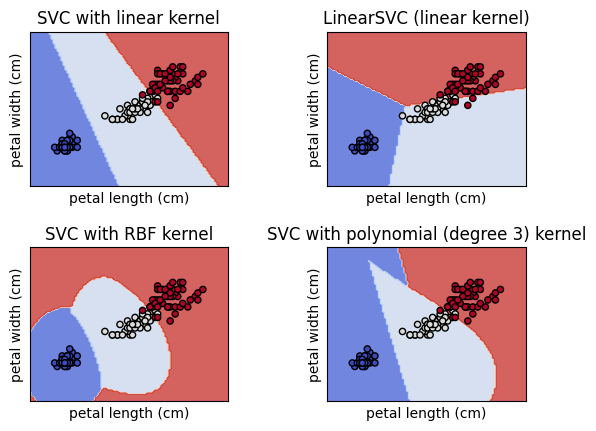

In [41]:
import matplotlib.pyplot as plt

from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

iris = datasets.load_iris()

X = iris.data[:, 2:4]
y = iris.target

C = 1.0
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.5, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[2],
        ylabel=iris.feature_names[3],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

In [42]:
###KNN

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
sleep = pd.read_csv('/content/drive/MyDrive/Sleep_health_and_lifestyle_dataset.csv', encoding='latin1')
sleep.head()

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


In [44]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


In [45]:
sleep['Sleep Disorder'] = sleep['Sleep Disorder'].map({'Sleep Apnea': 2, 'Insomnia': 3}).fillna(1)
sleep['BMI Category'] = sleep['BMI Category'].map({'Normal': 1, 'Normal Weight': 2, 'Obese': 3, 'Overweight': 4})

print(sleep['Sleep Disorder'].value_counts())
print(sleep['BMI Category'].value_counts())

Sleep Disorder
1.0    219
2.0     78
3.0     77
Name: count, dtype: int64
BMI Category
1    195
4    148
2     21
3     10
Name: count, dtype: int64


In [46]:
print(sleep['Sleep Duration'].min())
print(sleep['Sleep Duration'].max())
print(sleep['Quality of Sleep'].min())
print(sleep['Quality of Sleep'].max())
print(sleep['Physical Activity Level'].min())
print(sleep['Physical Activity Level'].max())
print(sleep['Stress Level'].min())
print(sleep['Stress Level'].max())
print(sleep['Age'].max())
print(sleep['Age'].min())
print(sleep['BMI Category'].max())
print(sleep['BMI Category'].min())

5.8
8.5
4
9
30
90
3
8
59
27
4
1


In [47]:
print(sleep['Sleep Duration'].mean())
print(sleep['Quality of Sleep'].mean())
print(sleep['Physical Activity Level'].mean())
print(sleep['Stress Level'].mean())
print(sleep['Heart Rate'].mean())
print(sleep['Age'].mean())
print(sleep['BMI Category'].mean())

7.132085561497325
7.31283422459893
59.17112299465241
5.385026737967914
70.16577540106952
42.18449197860963
2.2967914438502675


In [48]:
feature = sleep[['Age', 'Sleep Duration', 'Quality of Sleep', 'Physical Activity Level', 'Stress Level', 'BMI Category']]
target = sleep['Sleep Disorder']
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.3, random_state=42)

Text(0.5, 1.0, 'accuracy vs k')

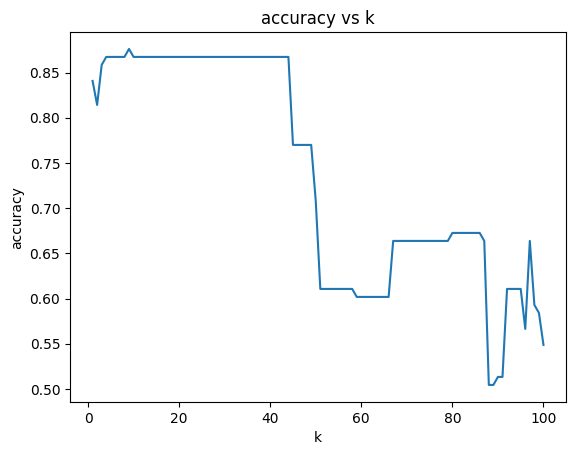

In [49]:
k_list = range(1, 101)
accuracies = []
for k in k_list:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(feature_train, target_train)
  accuracies.append(knn.score(feature_test, target_test))

plt.plot(k_list, accuracies)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.title('accuracy vs k')

In [50]:
for i in range(5, 21):
  knn = KNeighborsClassifier(n_neighbors=i).fit(feature_train, target_train)
  print(f"{i}: {knn.score(feature_test, target_test):.4f}")

5: 0.8673
6: 0.8673
7: 0.8673
8: 0.8673
9: 0.8761
10: 0.8673
11: 0.8673
12: 0.8673
13: 0.8673
14: 0.8673
15: 0.8673
16: 0.8673
17: 0.8673
18: 0.8673
19: 0.8673
20: 0.8673


In [51]:
knn = KNeighborsClassifier(n_neighbors=9).fit(feature_train, target_train)

In [54]:
#Gender male:1, female:2
#Age (27~59) 42
#Sleep Duration 높을수록 수면시간 증가(5.8~8.4) 7.1
#Quality of Sleep 높을수록 수면품질 증가(4~9) 7
#Physical Activity Level (30~90) 60
#Stress Level (3~8) 5
#BMI Category 'Normal': 1, 'Normal Weight': 2, 'Obese': 3, 'Overweight': 4 (mean: 2)
#Heart Rate (65~86) 70

#None 1 균형
#sleep apnea: 2 높은연령, 낮은 수면시간, 낮은 수면품질, 높은 활동수준, 높은 스트레스, 높은 BMI
#Insomnia: 3 낮은연령, 낮은 수면시간, 낮은 수면 품질, 조금 낮은 활동수준, 평균스트레스, 평균 BMI


sample = np.array([[30, 6.0, 6, 60, 5, 2],
                   [60, 6.0, 5, 70, 5, 3],
                   [40, 7.0, 6, 40, 4, 3],
                   [60, 6.0, 6, 90, 5, 4],  #30->60, 60->90, 2->4


                   ])
print(knn.predict(sample))

[1. 2. 3. 2.]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [55]:
predictions = knn.predict(sample)

def analyze_cause(sample, prediction):
    for i, (data, pred) in enumerate(zip(sample, prediction)):
        age, sleep_duration, sleep_quality, activity, stress, bmi = data
        print(f"샘플 {i+1}:")
        if pred == 2:
            causes = []
            if age > 42:
                causes.append("높은 연령")
            if sleep_duration < 6.5:
                causes.append("낮은 수면 시간")
            if sleep_quality < 7:
                causes.append("낮은 수면 품질")
            if activity > 70:
                causes.append("높은 활동 수준")
            if stress > 6:
                causes.append("높은 스트레스 수준")
            if bmi > 3:
                causes.append("높은 BMI")
            print(f"예측: Sleep Apnea")
            print(f"주요 원인: {', '.join(causes)}")

        elif pred == 3:
            causes = []
            if age < 42:
                causes.append("낮은 연령")
            if sleep_duration < 6.5:
                causes.append("낮은 수면 시간")
            if sleep_quality < 7:
                causes.append("낮은 수면 품질")
            if activity < 60:
                causes.append("낮은 활동 수준")
            if 4 <= stress <= 6:
                causes.append("평균 스트레스 수준")
            if bmi >= 2:
                causes.append("높은 BMI")
            print(f"  예측: Insomnia")
            print(f"  주요 원인: {', '.join(causes)}")

# 원인 분석 실행
analyze_cause(sample, predictions)

샘플 1:
샘플 2:
예측: Sleep Apnea
주요 원인: 높은 연령, 낮은 수면 시간, 낮은 수면 품질
샘플 3:
  예측: Insomnia
  주요 원인: 낮은 연령, 낮은 수면 품질, 낮은 활동 수준, 평균 스트레스 수준, 높은 BMI
샘플 4:
예측: Sleep Apnea
주요 원인: 높은 연령, 낮은 수면 시간, 낮은 수면 품질, 높은 활동 수준, 높은 BMI


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
